# https://archive.ics.uci.edu/ml/datasets/student+performance

In [129]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image

In [130]:
raw_data = pd.read_csv('student-por.csv', sep=';')
print('Shape =', raw_data.shape)

raw_data.info()
raw_data.head()

Shape = (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    obje

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


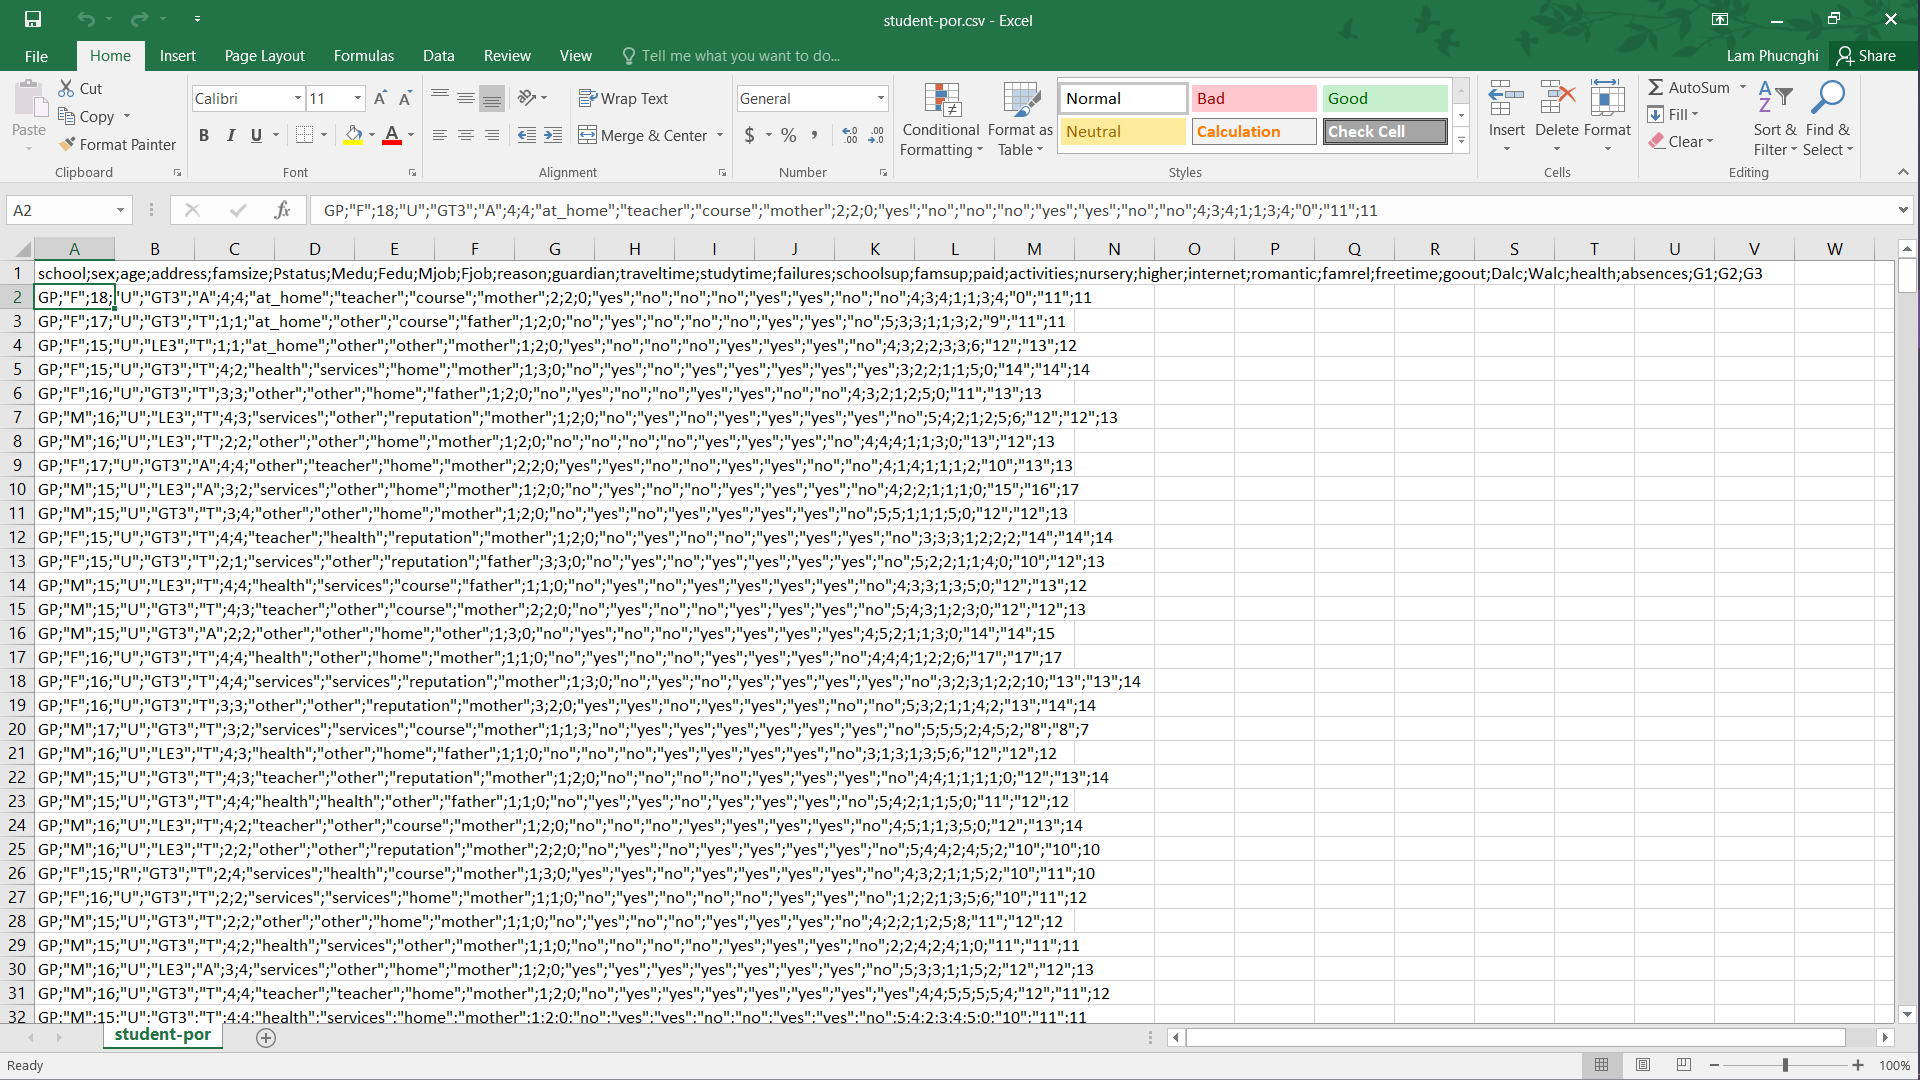

In [131]:
path = './picture/'
Image(filename = path + 'studentporraw.png')

In [132]:
print('Shape = {}'.format(raw_data.shape))
attrNameList = raw_data.columns.tolist();

Shape = (649, 33)


In [133]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
le_data = raw_data.copy();
for attr in attrNameList:
    le_data[attr] = LE.fit_transform(le_data[attr])
    
le_data.to_csv('student-por-le.csv')
print('Exported!')

Exported!


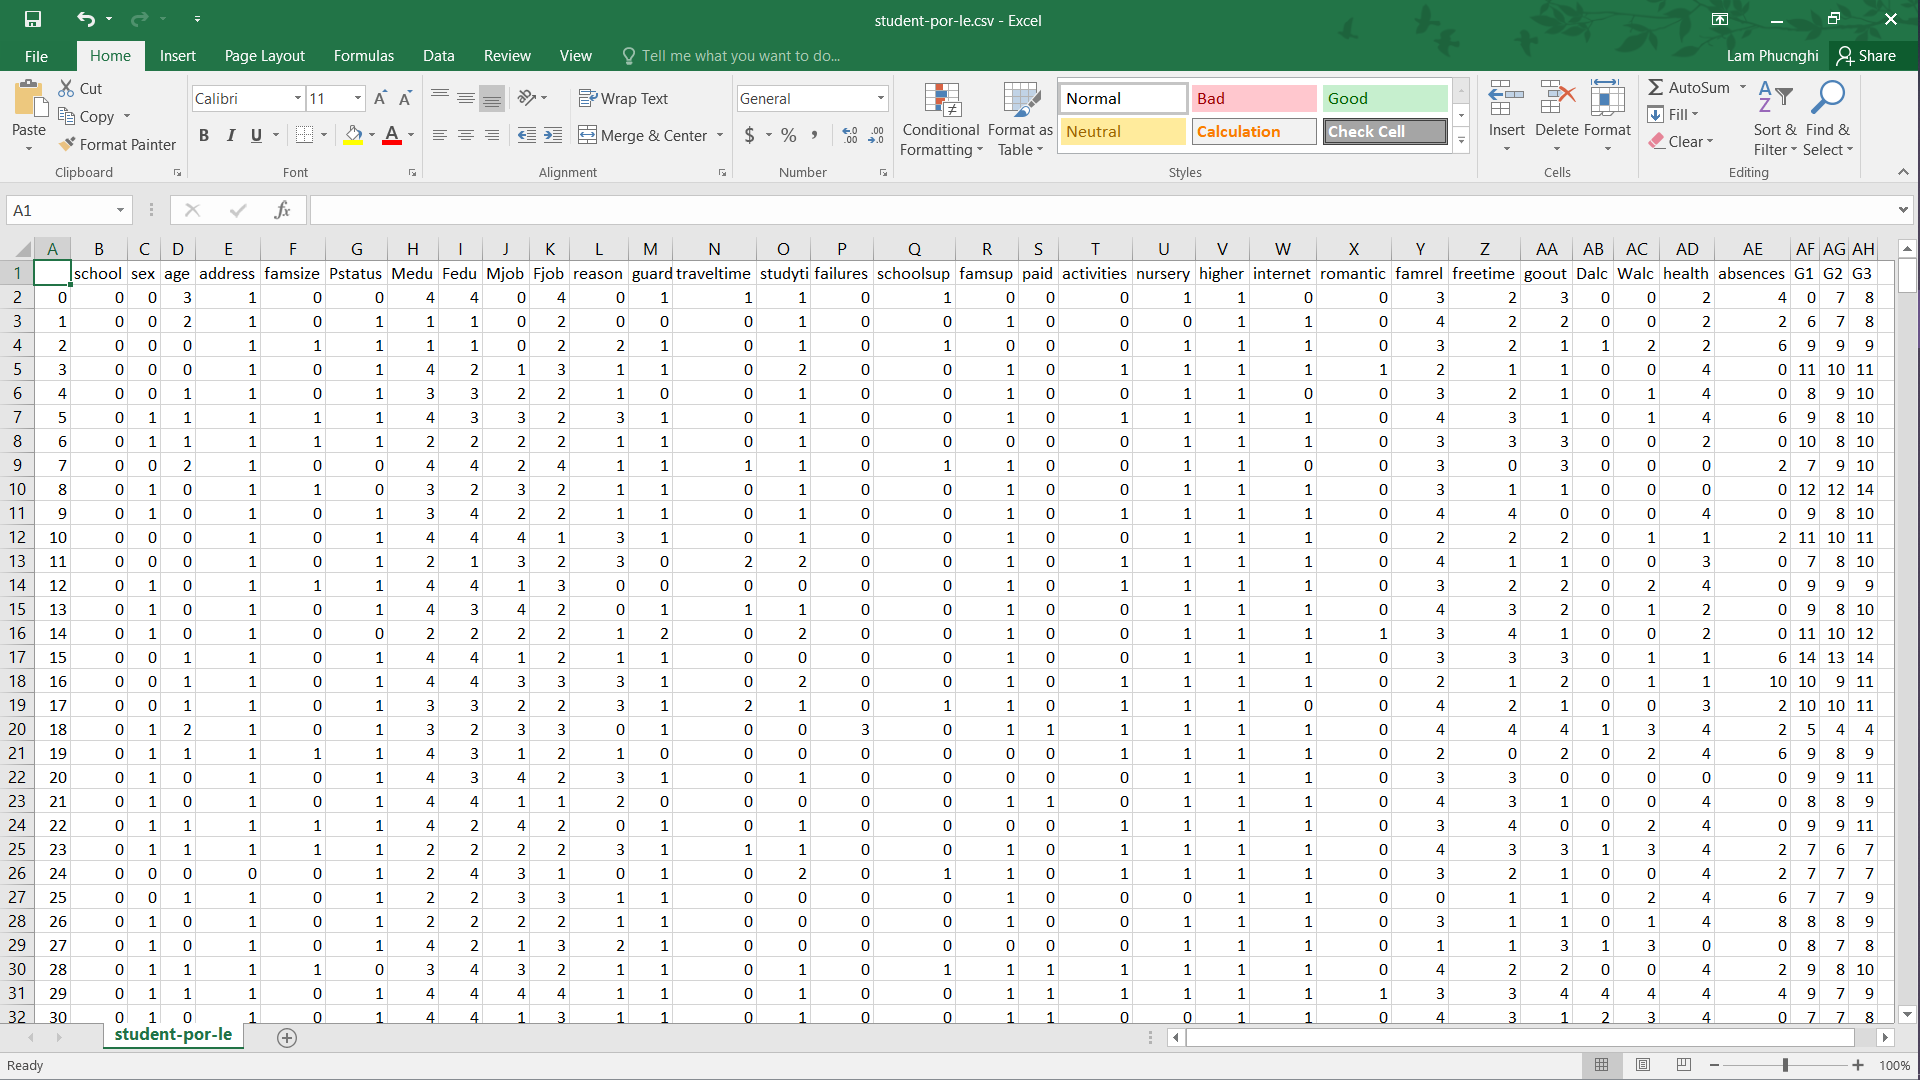

In [134]:
Image(filename = path + 'studentporle.png')

In [135]:
le_data.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,4,0,7,8
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,2,6,7,8


In [136]:
X = le_data.values[:,:-1];
y = le_data.values[:,-1:].flatten();
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('X_train[0] : ', *X_train[0])
print('Classifier value: ', set(y_train))

(584, 32)
(65, 32)
(584,)
(65,)
X_train[0] :  0 0 3 1 0 1 4 3 3 2 1 0 0 1 0 0 1 0 0 1 1 1 1 2 0 1 0 2 1 2 12 11
Classifier value:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print('X_train[0] : ', *X_train[0], sep='\t')

X_train[0] : 	0.0	0.0	0.42857142857142855	1.0	0.0	1.0	1.0	0.75	0.75	0.5	0.3333333333333333	0.0	0.0	0.3333333333333333	0.0	0.0	1.0	0.0	0.0	1.0	1.0	1.0	1.0	0.5	0.0	0.25	0.0	0.5	0.25	0.08695652173913043	0.8	0.7333333333333333


In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 1
acc_score = 0
acc_score_after = 1
y_pred = None
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
#                                             sqrt(sum((x - y)^2))
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)
print('classification_report:\n', metrics.classification_report(y_test, y_pred))


accuracy:
 7.6923076923076925
k =  1
accuracy:
 9.230769230769232
k =  2
accuracy:
 3.076923076923077
k =  3
accuracy:
 3.076923076923077
k =  4
y_pred:
 14 14 14 14 14 13 14 13 9 14 14 14 14 14 14 14 11 9 15 14 14 14 14 14 14 14 11 13 14 14 14 14 7 14 14 14 14 14 14 14 14 13 9 11 14 11 14 11 14 14 14 11 14 14 14 15 12 14 7 11 14 14 14 14 14
y_true:
 16 9 15 8 8 14 15 5 7 8 15 8 9 6 9 11 10 5 12 11 12 10 10 10 13 10 5 9 7 12 13 9 6 5 15 13 11 12 11 8 10 7 5 8 11 9 15 9 11 9 7 8 11 8 8 15 7 8 8 7 7 8 13 11 14
classification_report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         8
          12       0.00      

C:\Users\lamph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
k = 1
acc_score = 0
acc_score_after = 1
y_pred = None
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
#sum(|x - y|)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)
print('classification_report:\n', metrics.classification_report(y_test, y_pred))

accuracy:
 15.384615384615385
k =  1
accuracy:
 12.307692307692308
k =  2
accuracy:
 13.846153846153847
k =  3
accuracy:
 15.384615384615385
k =  4
accuracy:
 16.923076923076923
k =  5
accuracy:
 12.307692307692308
k =  6
accuracy:
 12.307692307692308
k =  7
y_pred:
 10 11 10 7 8 14 14 10 7 10 9 9 10 12 8 10 9 7 8 14 10 9 9 10 10 8 8 11 13 10 9 14 7 11 9 14 11 8 11 13 9 11 10 13 12 5 10 5 10 9 14 8 9 7 9 11 12 14 5 14 10 11 11 14 9
y_true:
 16 9 15 8 8 14 15 5 7 8 15 8 9 6 9 11 10 5 12 11 12 10 10 10 13 10 5 9 7 12 13 9 6 5 15 13 11 12 11 8 10 7 5 8 11 9 15 9 11 9 7 8 11 8 8 15 7 8 8 7 7 8 13 11 14
classification_report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.20      0.14      0.17         7
           8       0.29      0.17      0.21        12
           9       0.08      0.12      0.10         8
          10       0.07      0.17      0.10  

C:\Users\lamph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
k = 1
acc_score = 0
acc_score_after = 1
y_pred = None
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
#     max(|x - y|)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)
print('classification_report:\n', metrics.classification_report(y_test, y_pred))

accuracy:
 1.5384615384615385
k =  1
accuracy:
 9.230769230769232
k =  2
accuracy:
 10.76923076923077
k =  3
accuracy:
 10.76923076923077
k =  4
y_pred:
 14 15 15 14 15 15 15 5 5 15 15 14 15 15 15 15 15 10 15 15 14 15 15 15 14 14 15 14 15 15 14 14 5 15 14 14 14 15 15 15 15 5 15 15 14 14 15 15 14 15 14 14 15 14 14 15 14 14 5 10 15 15 15 14 14
y_true:
 16 9 15 8 8 14 15 5 7 8 15 8 9 6 9 11 10 5 12 11 12 10 10 10 13 10 5 9 7 12 13 9 6 5 15 13 11 12 11 8 10 7 5 8 11 9 15 9 11 9 7 8 11 8 8 15 7 8 8 7 7 8 13 11 14
classification_report:
               precision    recall  f1-score   support

           5       0.20      0.20      0.20         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         8
          12       0.00      

C:\Users\lamph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
k = 1
acc_score = 0
acc_score_after = 1
y_pred = None
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
#     sum(|x - y|^p)^(1/p)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)
print('classification_report:\n', metrics.classification_report(y_test, y_pred))

accuracy:
 7.6923076923076925
k =  1
accuracy:
 9.230769230769232
k =  2
accuracy:
 3.076923076923077
k =  3
accuracy:
 3.076923076923077
k =  4
y_pred:
 14 14 14 14 14 13 14 13 9 14 14 14 14 14 14 14 11 9 15 14 14 14 14 14 14 14 11 13 14 14 14 14 7 14 14 14 14 14 14 14 14 13 9 11 14 11 14 11 14 14 14 11 14 14 14 15 12 14 7 11 14 14 14 14 14
y_true:
 16 9 15 8 8 14 15 5 7 8 15 8 9 6 9 11 10 5 12 11 12 10 10 10 13 10 5 9 7 12 13 9 6 5 15 13 11 12 11 8 10 7 5 8 11 9 15 9 11 9 7 8 11 8 8 15 7 8 8 7 7 8 13 11 14
classification_report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         8
          12       0.00      

C:\Users\lamph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
#REGRESSION
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

y_pred = None
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
#                                             sqrt(sum((x - y)^2))
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    r2_score = metrics.r2_score(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    print('k = ', k)
    print('r2_score          = {}'.format(r2_score))
    print('Mean square error = {}'.format(MSE))
    k+=1
print('y_pred[0:10]:\n', *y_pred[:10])
print('y_true[0:10]:\n', *y_test[:10])



k =  1
r2_score          = -1.530016194784162
Mean square error = 21.446153846153845
k =  2
r2_score          = -1.2977048081755735
Mean square error = 19.476923076923075
k =  3
r2_score          = -1.2799587994763062
Mean square error = 19.326495726495725
k =  4
r2_score          = -1.2399672614061537
Mean square error = 18.9875
k =  5
r2_score          = -1.2545094097280391
Mean square error = 19.110769230769233
k =  6
r2_score          = -1.2187552353828108
Mean square error = 18.807692307692307
k =  7
r2_score          = -1.2324783490209614
Mean square error = 18.92401883830455
k =  8
r2_score          = -1.2357135128720609
Mean square error = 18.951442307692307
k =  9
r2_score          = -1.2140834641532687
Mean square error = 18.768091168091168
k =  10
r2_score          = -1.187284302228178
Mean square error = 18.540923076923075
k =  11
r2_score          = -1.143150538572339
Mean square error = 18.16681500317864
k =  12
r2_score          = -1.132596346555971
Mean square error = 1